# Edge Detection Kernels

In this notebook, we are going to see applications of two edge detection kernels. First one is the well-known Sobel kernel, and second one we would provide ourselves and compare the results. Key idea behind both of these kernels are computing the gradients of an image, which is the abrupt changes in pixel intensities. This action can also be interpreted as high-pass filtering, which we have learned in a previous notebook using Fourier Transform.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

## Sobel Kernel

We would first provide our own Sobel kernels for individual directions and then use OpenCV utilities to create the kernels for us. In each case we would create a binary image at the end, which is a useful tool in Computer Vision. The Sobel kernel, which we are going to create ourselves, look like this.

```text
# Sobel kernel to compute the vertical gradients in x-direction
[[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]]

# Sobel kernel to compute the horizontal gradients in y-direction
[[1, 2, 1],
[0, 0, 0],
[-1, -2, -1]]
```

### Using own Sobel kernel

Following functions would be useful in using our own Sobel kernel and creating the binary image.

* [cv2.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) - It applies an arbitrary linear filter to an image. In order to create a same convolution i.e., to generate the output image of the same size, we need to provide the `ddepth` parameter as -1 in this function.
* [cv2.threshold](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57) - It thresholds the pixel intensities and helpful to create a binary image. We have to provide `thresh` parameter to set an upper bound of pixel intensities and a `maxval` parameter with the `THRESH_BINARY` flag to replace all intensities above `thresh` with the `maxval` intensity and all intensities below `thresh` to 0.

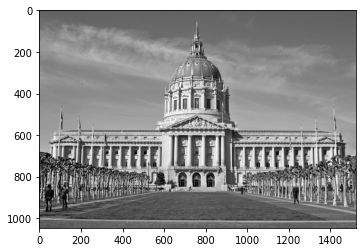

In [72]:
# Import and visualize image
img: np.ndarray = cv2.imread('./images/city_hall.jpg', flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray');

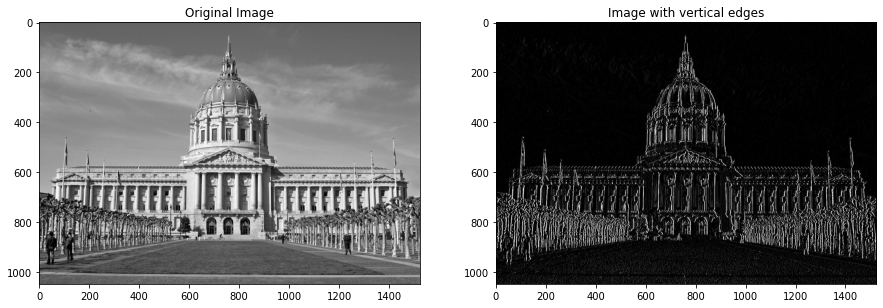

In [73]:
# Define x-directional Sobel kernel
sobel_x: np.ndarray = np.array([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]])
grad_x: np.ndarray = cv2.filter2D(src=img, ddepth=-1, kernel=sobel_x)
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(grad_x, cmap='gray')
ax2.set_title('Image with vertical edges');

With the above we have detected the vertical edges in the image. The way to convince ourselves with that is to observe, that the only those changes are detected in the edge image, where a strong change in pixel intensity is taking place in the original image with the vertical orientation.

Now we are going to use pixel intensity threshold in order to have the vertical edges pop more clearly. We would create a binary image by replacing all pixel intensities above a threshold value to 255 and below the threshold value to 0. This is a useful thing to do in Computer Vision.

Unique pixel intensities in binary image: [  0 255]


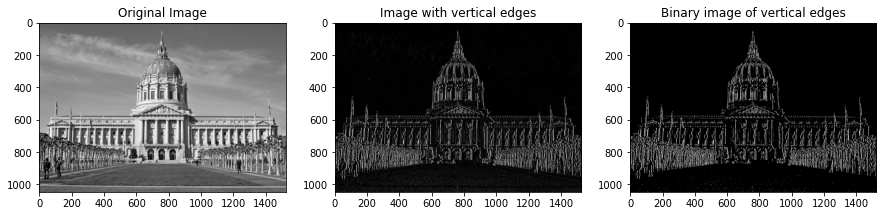

In [74]:
_, bin_grad_x = cv2.threshold(src=grad_x, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
print(f'Unique pixel intensities in binary image: {np.unique(bin_grad_x)}')
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(grad_x, cmap='gray')
ax2.set_title('Image with vertical edges')
ax3.imshow(bin_grad_x, cmap='gray')
ax3.set_title('Binary image of vertical edges');

Comparing all the three pictures above we understand the difference between the normal and the binary image. Binary image has just two distinct pixel intensities, 0 and 255. This makes the edges to appear clearer. Now we do the same thing with the horizontal edges.

Unique pixel intensities in binary image: [  0 255]


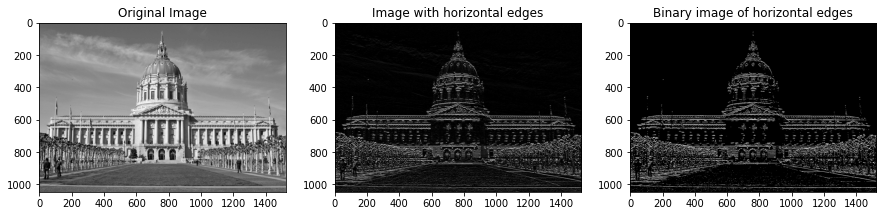

In [75]:
sobel_y: np.ndarray = np.array([[1, 2, 1],
                                [0, 0, 0],
                                [-1, -2, -1]])
grad_y: np.ndarray = cv2.filter2D(src=img, ddepth=-1, kernel=sobel_y)
_, bin_grad_y = cv2.threshold(src=grad_y, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
print(f'Unique pixel intensities in binary image: {np.unique(bin_grad_y)}')
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(grad_y, cmap='gray')
ax2.set_title('Image with horizontal edges')
ax3.imshow(bin_grad_y, cmap='gray')
ax3.set_title('Binary image of horizontal edges');

Now comparing gradients in the x direction and y direction we can understand, that there is a strong difference in terms of directional gradients. In the x directional gradients earlier the vertical edges were captured. In the y directional gradients later the horizontal edges are captured. In order to have a clear picture with both directional gradients we could also do the following.

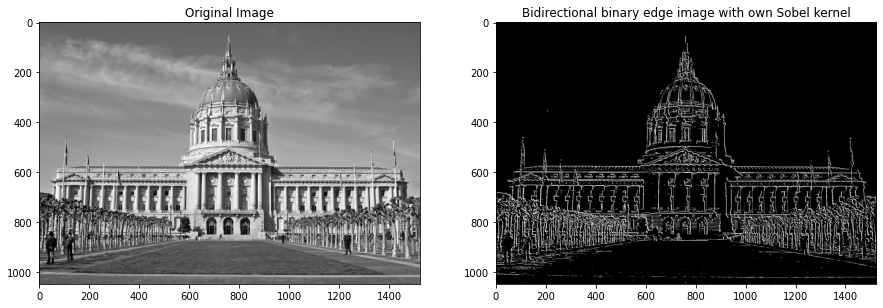

In [76]:
grad: np.ndarray = cv2.addWeighted(src1=grad_x, alpha=0.5, src2=grad_y, beta=0.5, gamma=0)
_, bin_grad = cv2.threshold(src=grad, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(bin_grad, cmap='gray');
ax2.set_title('Bidirectional binary edge image with own Sobel kernel');

The plot above captures the edges in both directions in the same image.

### Using Sobel kernel from OpenCV

Unique pixel intensities in binary image: [  0 255]


Text(0.5, 1.0, 'Direction of the gradient')

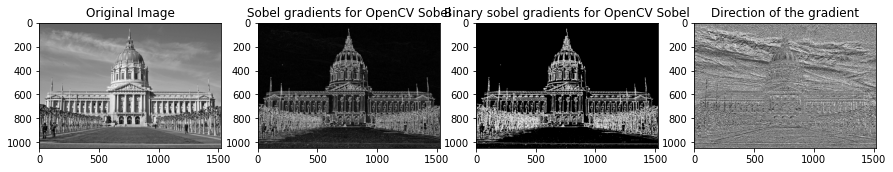

In [77]:
sobel_grad_x: np.ndarray = cv2.Sobel(src=img, ddepth=cv2.CV_16S, dx=1, dy=0, ksize=3)
sobel_grad_y: np.ndarray = cv2.Sobel(src=img, ddepth=cv2.CV_16S, dx=0, dy=1, ksize=3)
abs_grad_x: np.ndarray = cv2.convertScaleAbs(src=sobel_grad_x)
abs_grad_y: np.ndarray = cv2.convertScaleAbs(src=sobel_grad_y)
sobel_grad: np.ndarray = cv2.addWeighted(src1=abs_grad_x, alpha=0.5, src2=abs_grad_y, beta=0.5, gamma=0)
_, bin_sobel_grad = cv2.threshold(src=sobel_grad, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
dir_grad: np.ndarray = np.arctan2(sobel_grad_y, sobel_grad_x)
print(f'Unique pixel intensities in binary image: {np.unique(bin_sobel_grad)}')
_, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(sobel_grad, cmap='gray')
ax2.set_title('Sobel gradients for OpenCV Sobel')
ax3.imshow(bin_sobel_grad, cmap='gray')
ax3.set_title('Binary sobel gradients for OpenCV Sobel')
ax4.imshow(dir_grad, cmap='gray')
ax4.set_title('Direction of the gradient')

Now comparing the results from our own Sobel kernel and the one from OpenCV it appears, that the OpenCV kernel has detected richer edges in terms of edge details, which is expected. Now we can also try another high-pass filtering kernel of our own and see, if that makes any difference.

### Unidirectional High-Pass Filtering Kernel

Our unidirectional high-pass filtering kernel looks like this.
```text
[[0, -1, 0],
[-1, 4, -1],
[0, -1, 0]]
```
This kernel does not capture the essence of directional gradients. Rather it computes the pixel intensity difference of the middle pixel against the adjacent pixels.

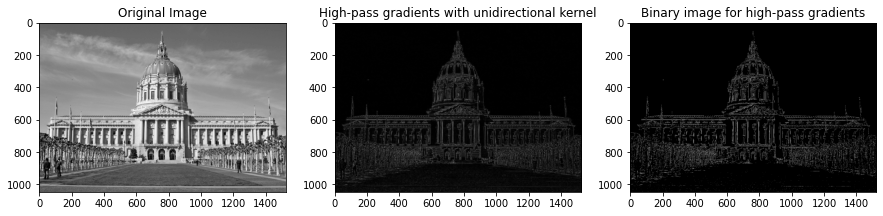

In [78]:
high_pass_kernel: np.ndarray = np.array([[0, -1, 0],
                                        [-1, 4, -1],
                                        [0, -1, 0]])
high_pass_grad: np.ndarray = cv2.filter2D(src=img, ddepth=-1, kernel=high_pass_kernel)
_, bin_high_pass_grad = cv2.threshold(src=high_pass_grad, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(high_pass_grad, cmap='gray')
ax2.set_title('High-pass gradients with unidirectional kernel')
ax3.imshow(bin_high_pass_grad, cmap='gray')
ax3.set_title('Binary image for high-pass gradients');

Comparing all of our results we understand, that the unidirectional high-pass filter also detected edges, however the edges are comparatively weaker.